# <font color='blue'>Challenge: The famous Deutsch-Josza Algorithm </font> 

In this challenge, you will implement the [Deutsch-Josza Algorithm](https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1992.0167), one of the 
first algorithms which was developed to show an exponential improvement over all classical 
algorithms for a particular task.

# <font color='green'>Problem:</font> 
You are given a function, $f(x)$, and told that this function is either:
* *constant* on all inputs x - Meaning $f(x) = 0$ **or** $f(x) = 1$, $\forall x \in \{0, 1\}^{n}$
or
* *balanced* -  Meaning $f(x) = 0$ for **exactly** half the inputs x, and $f(x) = 1$ for the other half.

You have to determine which of the above describes the function $f$.
(Note: Since you are given the promise, $f$ falls *exactly* into one of the categories above, it cannot be 
anything else.)


## <font color='orange'>Step 1 (Preparation):</font> 

For this we must use $n$ qubits, and one extra qubit, an *ancilla*.

The first $n$ qubits are initialised in the state $|0\rangle$, while the ancilla is in the 
state $|1\rangle$.

### <font color='red'>Task:</font> 
Prepare a circuit (program) which prepares the following state:
$|0\rangle^{\otimes n}|1\rangle$

(Take $n=3$ for this example)

In [ ]:
from pyquil import Program
from pyquil.api import get_qc, WavefunctionSimulator, local_qvm
import numpy as np

# Import the other required things you may need here (gates):

from pyquil.gates import *
 
make_wf = WavefunctionSimulator()

In [ ]:
n_qubits = 2
circuit = Program()

# We will use a 2+1 = 3q-qvm for this example:

qc = get_qc('{}q-qvm'.format(n_qubits+1))

qubits = qc.qubits()
# It is simpler to pick your device first, and then 
# deal with the qubits it provides

circuit += # Add code here


## <font color='orange'>Step 2 (Hadamard # 1):</font> 

### <font color='red'>Task:</font> 
Now, apply Hadamards to ***all*** qubits:

In [ ]:
# Add code here
circuit += 
circuit += 
circuit +=

## <font color='orange'>Step 3 (Oracle):</font> 


The oracle is like a magical powerful entity which can (for example) compute the value of a function in a single step, for any value of the input, $x$:

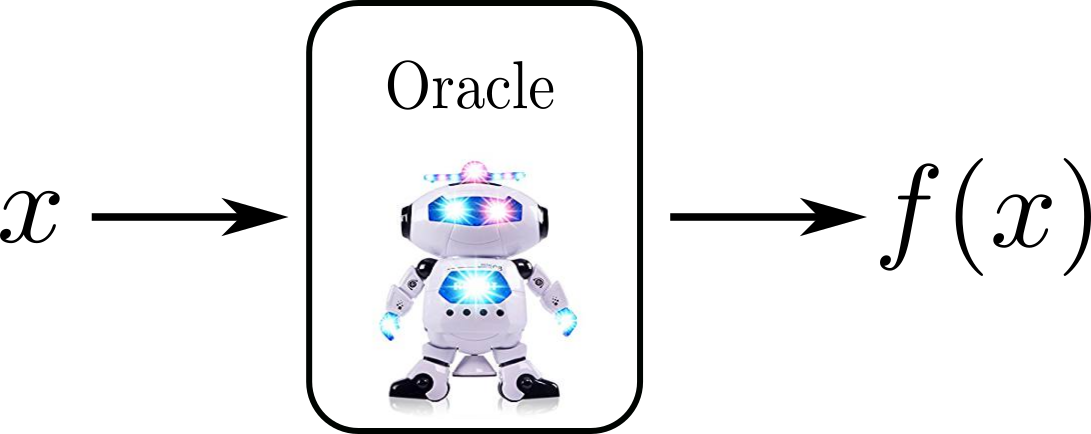

The quantum oracle is similar except it has to be *unitary*, which means it has to use an ancilla in order to ensure its operation is reversible:

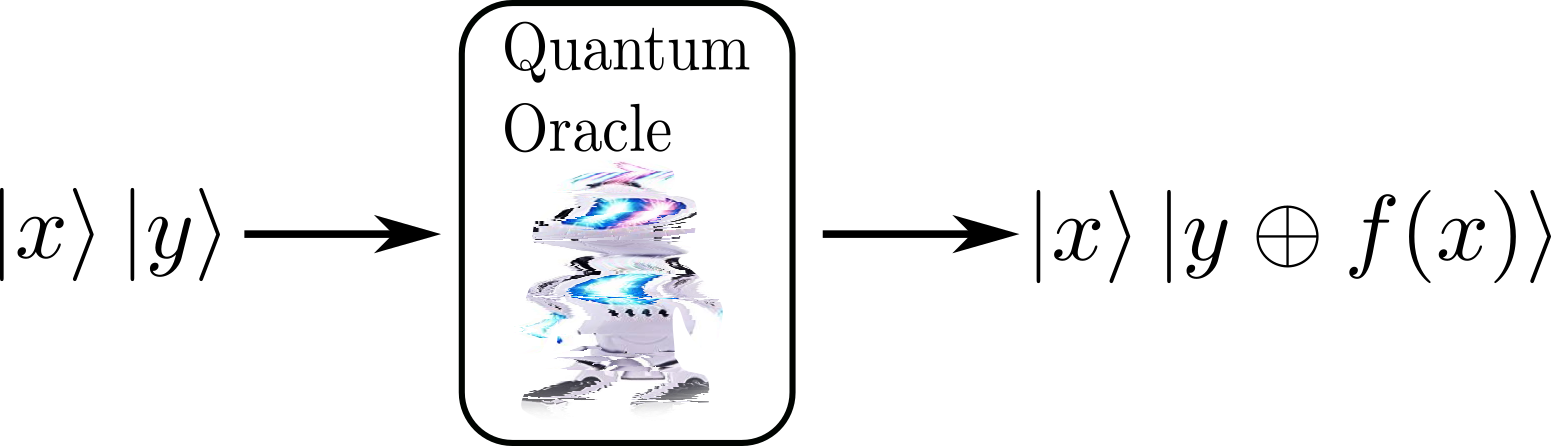

We will need to construct the unitary which implements the oracle, which is defined by:

\begin{align}
|x\rangle|y\rangle \rightarrow |x\rangle|y\oplus f(x)\rangle
\end{align}

Where $f(x)$ is the function we wish to check is constant or balanced. 

*Note: We must **know** that $f$ is **exactly** one of these two options. If $f$ some other more general function, the Deutsch-Josza Algorithm will not necessarily give a speedup.*

We will have to explicitly construct the function in this example in order to work with it, but the point
of the oracle in general is to abstract the function as some black box.

In [ ]:
# Define a balanced function over two qubits as an example:
f = {'00':1, '01': 0, '10': 1, '11':0} # f = 0 for half the inputs, and f = 1 for the other half.

We will step through in detail the process for constructing the oracle:

This function has the following action on the 'inputs':

\begin{align}
f(00) &= 1\\
f(01) &= 0\\
f(10) &= 1\\
f(11) &= 0
\end{align}

Therefore, we can see how it behaves with the 8 possible computational basis states of 3 qubits:
$\left\{|000\rangle, |010\rangle, |100\rangle, |110\rangle, |001\rangle, |011\rangle, |101\rangle, |111\rangle\right\}$.

Where the third qubit (qubit \#2) is the carries the value, $y$:
\begin{align}
|000\rangle &\rightarrow |00(0\oplus f(00))\rangle = |001\rangle \\
|010\rangle &\rightarrow |01(0\oplus f(01))\rangle = |011\rangle\\
|100\rangle &\rightarrow |10(0\oplus f(10))\rangle = |101\rangle\\
|110\rangle &\rightarrow |11(0\oplus f(11))\rangle = |111\rangle\\
|001\rangle &\rightarrow |00(1\oplus f(00))\rangle = |000\rangle\\
|011\rangle &\rightarrow |01(1\oplus f(01))\rangle = |011\rangle\\
|101\rangle &\rightarrow |10(1\oplus f(10))\rangle = |100\rangle\\
|111\rangle &\rightarrow |11(1\oplus f(11))\rangle = |111\rangle\\
\end{align}


You can check that the unitary which does this transformation is given by:
\begin{align}
U_f = \left(
\begin{array}{cccccccc}
0 & 1 & 0& 0& 0 & 0 & 0 & 0 \\
1 & 0 & 0& 0& 0 & 0 & 0 & 0 \\
0 & 0 & 1& 0& 0 & 0 & 0 & 0 \\
0 & 0& 0& 1& 0 & 0 & 0 & 0 \\
0 & 0 & 0& 0& 0 & 1 & 0 & 0 \\
0 & 0 & 0& 0& 1 & 0 & 0 & 0 \\
0 & 0 & 0& 0& 0 & 0 & 1 & 0 \\
0 & 0 & 0& 0& 0 & 0 & 0 & 1 
\end{array}\right)
\end{align}

Now, this will not be a native gate in PyQuil, so we will have to define it manually.

*Note: You could decompose this gate into single and two qubit gates to implement directly, but for now we will just implement it manually as a single gate.*

In [ ]:
from pyquil.quil import DefGate # Import the function that allows us to define our own gates manually
oracle_gate = np.array([ 
                        [0, 1, 0, 0, 0, 0, 0, 0],\
                        [1, 0, 0, 0, 0, 0, 0, 0], \
                        [0, 0, 1, 0, 0, 0, 0, 0],\
                        [0, 0, 0, 1, 0, 0, 0, 0],\
                        [0, 0, 0, 0, 0, 1, 0, 0],\
                        [0, 0, 0, 0, 1, 0, 0, 0],\
                        [0, 0, 0, 0, 0, 0, 1, 0],\
                        [0, 0, 0, 0, 0, 0, 0, 1]] )


oracle_gate_definition = DefGate("ORACLE_GATE", oracle_gate) # This will define the gate for use
ORACLE_GATE = oracle_gate_definition.get_constructor()

Now apply the oracle to the circuit just like [this](http://docs.rigetti.com/en/stable/basics.html):

In [ ]:
circuit += oracle_gate_definition
circuit += ORACLE_GATE(0, 1, 2)


## <font color='orange'>Step 4 (Hadamard # 2):</font> 

## <font color='red'>Task: </font> 

Finally, apply Hadamard gates to all qubits ***except*** the ancilla

In [ ]:
# circuit += # Add gates here

## <font color='orange'>Step 5 (Measure):</font> 

## <font color='red'>Task: </font> 


Now measure the '*input*' qubits in the computational basis. Don't forget to add memory for each one

*Note: Before you measure, why don't you try printing out the wavefunction? The probability of getting the zero outcome, $|0\rangle^{\otimes n}$ will tell us whether the function is constant or balanced:*
\begin{align}
\Pr\left(|State\rangle = |0\rangle^{\otimes n}\right) = 
\begin{cases}
0 \implies f(x) \text{ is balanced }\\
1 \implies f(x) \text{ is constant }
\end{cases}
\end{align}

In [ ]:
ro = circuit.declare('ro', 'BIT', n_qubits)
for qubit in range(n_qubits):
    circuit += MEASURE(qubits[qubit], ro[qubit])
print(circuit)

Print out the wavefunction and check by eye what the probability of getting $|0\rangle^{\otimes n}$ is:

*Recall: Pyquil uses the [little-endian](https://en.wikipedia.org/wiki/Gulliver%27s_Travels) notation so you will read the wavefunction back-to-front, i.e. $|0010\rangle$ indicates that qubits 0, 2 and 3 are in the state $|0\rangle$, while it is qubit **1** which is in the state $|1\rangle$. This is the reverse ordering to what is standard: where $|0010\rangle$ means qubit **2** is in the state $|1\rangle$. This just means you need to reverse the ordering of qubits when looking at a wavefunction to get the 'standard' ordering.*

*The reasoning behind this can be seen [here](https://arxiv.org/abs/1711.02086).*

In [ ]:
# Add code here


Now run and measure the circuit a few times and compute the probability of getting the all-zero string

*Hint: it should be **exactly** zero since the function is balanced*


In [ ]:
# Add code here

### <font color='red'>Task:</font> 

Determine if the following function is constant or balanced:


\begin{align}
f(00) &= 1\\
f(01) &= 1\\
f(10) &= 1\\
f(11) &= 1
\end{align}


*Of course it is constant, $(f(x) = 1 \forall x)$, but write the quantum algorithm which shows this. Specifically, you will have to create the correct oracle.*

In [ ]:
circuit = Program()
# Add code here